In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

#### Importing Modules from Local Directory

In [6]:
project_root = os.path.abspath('..')

# Adding the project root to my system path
if project_root not in sys.path:
    sys.path.append(project_root)

from src.data_loader import telco_data_loader
from src.data_processor import telcoDataCleaner

/Users/samueljoseph/Documents/Programming/telco-customer-churn/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Loading Raw Data from Kaggle

In [7]:
# running the loader
raw_telco_data = telco_data_loader()

src.data_loader - Starting download of telco data
src.data_loader - Telco data download successful
src.data_loader - CSV data downloaded successfully


## Initial Data Exploration

In [8]:
print(f"Dataframe shape: {raw_telco_data.shape}")
print(f"Dataframe columns: {raw_telco_data.columns}")
print(raw_telco_data.info())

Dataframe shape: (7043, 21)
Dataframe columns: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   obj

#### Cleaning up the data for visualization

In [9]:
cleaner = telcoDataCleaner()

cleaned_data = cleaner.clean_data(raw_telco_data)['clean_table']

src.data_processor - Binary columns converted
src.data_processor - Converting gender
src.data_processor - Data types successfully converted
src.data_processor - Outlier Summary: {}
src.data_processor - Columns with missing values: {'OnlineSecurity': np.int64(1526), 'DeviceProtection': np.int64(1526), 'TechSupport': np.int64(1526), 'StreamingTV': np.int64(1526), 'StreamingMovies': np.int64(1526), 'TotalCharges': np.int64(11)}
src.data_processor - Filled missing values in TotalCharges with medians
src.data_processor - Filled missing values in Churn with medians


#### Plotting

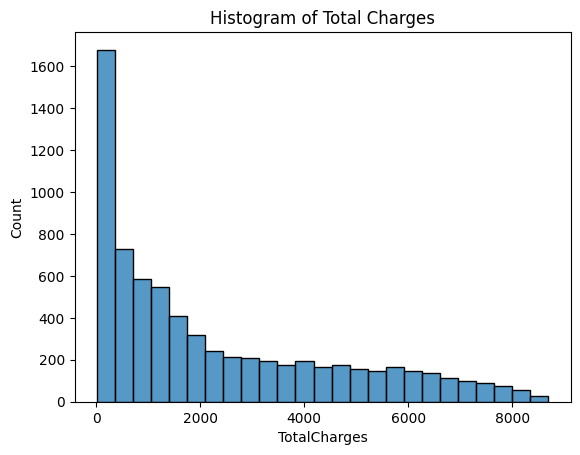

In [7]:
sns.histplot(data = cleaned_data, x = 'TotalCharges')
plt.title("Histogram of Total Charges")
plt.show()

In [10]:
print(cleaned_data.describe())

            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.504756       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  OnlineSecurity  DeviceProtection  TechSupport  \
count   7043.000000     5517.000000       5517.000000  5517.000000   
mean       0.903166        0.365960          0.439007     0.370491   
std        0.295752        0.481742          0.496311     0.482980   
min        0.000000        0.000000

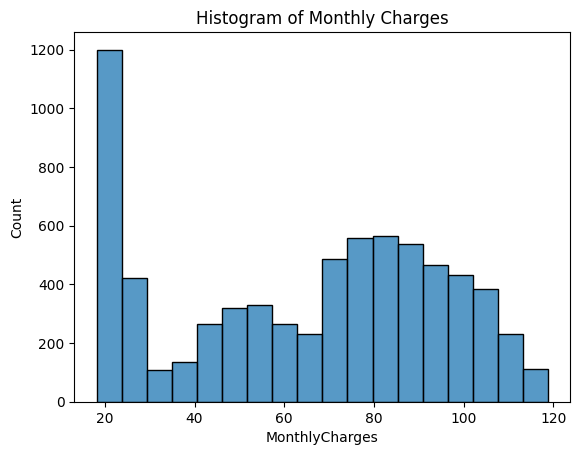

In [12]:
sns.histplot(data = cleaned_data, x = 'MonthlyCharges')
plt.title("Histogram of Monthly Charges")
plt.show()

Appears to be a trimodal distribution: a cluster of monthly charges around $20, another group around $50, and a final around $80

In [15]:
cleaned_data.loc[:, ['TechSupport', 'Churn']].groupby('TechSupport').mean()

,Churn
TechSupport,
0.0,0.416355
1.0,0.151663


In [16]:
cleaned_data.loc[:, ['SeniorCitizen', 'Churn']].groupby('SeniorCitizen').mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [18]:
cleaned_data.loc[:, ['SeniorCitizen', 'MonthlyCharges']].groupby('SeniorCitizen').mean()

,MonthlyCharges
SeniorCitizen,
0,61.847441
1,79.820359


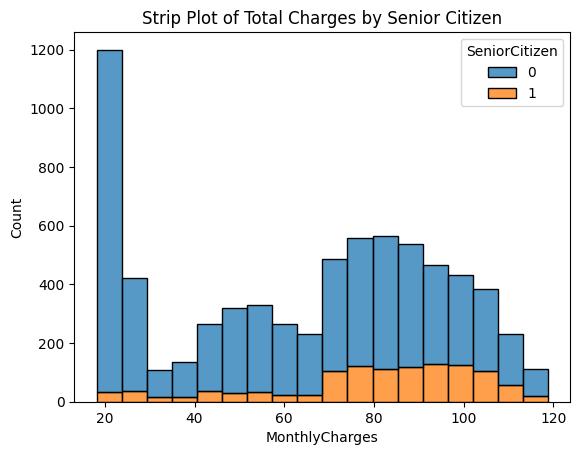

In [21]:
sns.histplot(data = cleaned_data,
             x = 'MonthlyCharges',
             hue = 'SeniorCitizen',
             multiple = 'stack')
plt.title('Strip Plot of Total Charges by Senior Citizen')
plt.show()

In [23]:
cleaned_data.loc[:, ['tenure', 'Churn']].groupby('Churn').mean()

,tenure
Churn,
0,37.569965
1,17.979133
